<a href="https://colab.research.google.com/github/JamesElcock/CS331/blob/main/Copy_of_2024_Lab_3_Forward_and_Backward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Forward and Backward Propagation

In this lab, you will gain hands-on experience in creating a feedforward neural network using [PyTorch](https://pytorch.org/). PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). Key features of PyTorch include dynamic neural networks, automatic differentiation, and dynamic computation.

By the end of this session, you will learn:

* **[[Exercise 1]](#ex1) Forward Pass** - How to create a feedforward network, and make predictions on new inputs.
* **[[Exercise 2]](#ex2) Backward Pass** - How to track gradient updates, visualise computational graph, and implement a training loop that involves a custom loss function, backpropagation, and optimisation with stochastic gradient descent (SGD).



# Warm-Up Exercise

For PyTorch newcomers, this warm-up exercise will demonstrate basic PyTorch usage for solving a pure mathematical problem.

If you are already familiar with PyTorch, feel free to skip this warm-up exercise and proceed directly to [Exercise 1](#ex1).

*   Given the following function:

$$y=x^2 + 3x + 1$$

1.   Using `PyTorch` autograd, compute $y'(2)$, *i.e.* the derivative of $y$ with respect to $x$ at a given point $x=2$.

2.  Using `torchviz`, visualise computational graph of $y$.

### Solution to Question (1)

First, we import PyTorch, and enable gradient computation by setting `torch.set_grad_enabled` to `True`.


In [1]:
# Import the 'torch' library for neural network operations
import torch

# Enable gradient computation
torch.set_grad_enabled(True)

Then, we create an input tensor `x`, initialise its value to `2`, and set `requires_grad=True` for `x` to track its gradient.

In [2]:
# Create input tensor
x = torch.tensor(2.0, requires_grad=True)

Next, we define a function that computes $y = x^2 + 3x + 1$. We evaluate the output $y$ by passing $x$ to the function.

In [3]:
# Define a function
def f(x):
    y = x ** 2 + 3 * x + 1
    return y

# Evaluate the output of the function
y = f(x)

After that, we call `y.backward()` to automatically compute the gradients of `y` with respect to `x` using `autograd`.

In [4]:
# Compute gradients
y.backward()

Finally, we access the computed gradient using `x.grad`.

In [5]:
# Access gradients
gradient = x.grad

print("Input x = ", x.item())
print("Gradient y'(2) = ", gradient.item())

Input x =  2.0
Gradient y'(2) =  7.0


###  Solution to Question (2)

The `torchviz` library provides visualisation capabilities for PyTorch computational graphs.

If this is your first time to use `torchviz`,  please install the following package to proceed:



In [6]:
# Install the torchviz library, which is required for creating PyTorch computational graphs.
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

First, we import the following two graph visualisation libraries:

In [7]:
# Import the torchviz library, which generates PyTorch computational graphs.
import torchviz

# Import the necessary modules from IPython.display, which displays images in the Jupyter Notebook.
from IPython.display import display, Image

Then, we create a visualisation of the computational graph in PyTorch, using `torchviz.make_dot`.

In [8]:
# Create a computational graph visualization using torchviz for the function y with x as a parameter
dot = torchviz.make_dot(y, params={"x": x, "y": y})

The `torchviz.make_dot` function typically takes two arguments:

*   The first argument, `y`, is the output tensor for which we want to generate the computational graph
*   The second argument, `params`, is an optional dictionary that allows us to provide input tensors to the graph for visualising the gradients or tracking specific tensors during the computation.

The output `dot` object from `torchviz.make_dot` can be rendered and saved as an image file using the `render` method.

Next, we specify the output format (e.g. PNG or SVG), using the `format` attribute of the `dot` object, and render and save the computational graph visualization as an image file named `computational_graph.png`.

In [9]:
# Render and save the computational graph visualization as an image file named "computational_graph.png"
dot.render(filename='computational_graph', directory='./', format = 'png', cleanup=True)

'computational_graph.png'

Finally, we display the rendered computational graph, using the `display` function from the `IPython.display` module.

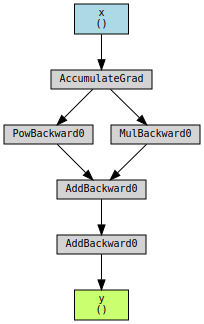

In [11]:
display(dot)

The computational graph generated above using `torchviz.make_dot`  for the given expression $y = x^2 + 3x + 1$ provides a visual representation of the operations and dependencies involved in computing the value of $y$ based on the input $x$.

This computational graph can be interpreted as follows:

*   Input Node (x): This node represents the input tensor x. It serves as the starting point of the computation.

*   Operation Nodes:

   *   `PowBackward0` node  ($x^2$):  This node represents the square operation performed on $x$, resulting in $x^2$.

   *   `MulBackward0` node ($3x$): This node represents the multiplication operation between 3 and $x$, resulting in $3x$.

   *   The first `AddBackward0` node (`PowBackward0` + `MulBackward0`): This node represents the addition operation between the results of `PowBackward0` node and `MulBackward0` node. It computes $(x^2) + (3x)$.  

   *   The second `AddBackward0` node (`AddBackward0` + 1): This node represents the addition operation between the results of the first `AddBackward0` node and 1. It computes $((x^2) + (3x)) + 1$.     

*   Output Node ($y$): This node represents the final output $y$, which returns the output value of the second `AddBackward0`.



---

# <a name="ex1">Exercise 1</a> - Create a Feedfoward Network and Make Predictions
  

In this exercise, we will employ PyTorch to complete the following two tasks:

1. Create a feedforward neural network with the following architecture:

*   Input Layer: 3 neurons
*   Hidden Layer: 2 neurons, with `Tanh()` activation function
*   Output Layer: 1 neuron, with  `Sigmoid()` activation function

2. Initially, the weights and biases of the network are as follows:

<figure>
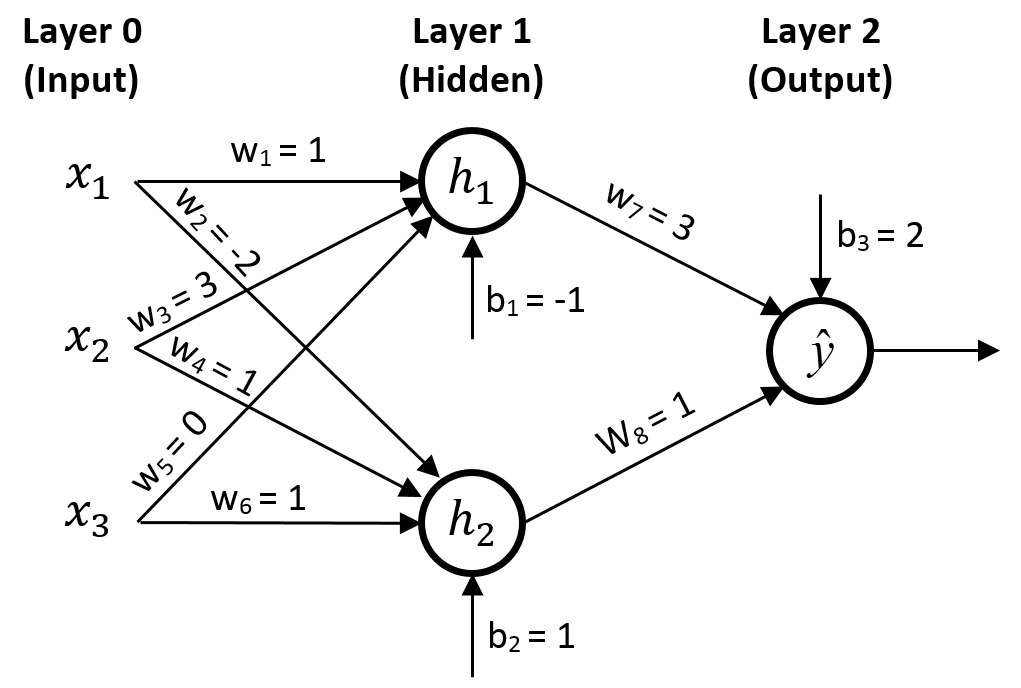
<figcaption>Figure 1 - A Feedforward Neural Network with Three Layers</figcaption>
</figure>

Given input values $(x_1, x_2, x_3) = (-1, 0, 1)$, predict the output of the network.

## 1.1 Import PyTorch Library

First, we import the PyTorch library `torch` and its neural network module `torch.nn`.

In [12]:
# Import the PyTorch library
import torch

# Import the neural network module from PyTorch
import torch.nn as nn

## 1.2 Define Fully Connected Layers

We now define two fully connected (linear) layers for the network. Each fully connected layer can be created using `nn.Linear(input_size, output_size)`, where `input_size` and `output_size` denote the number of neurons for input and output, respectively.


In [13]:
# TODO: Add a line of code to create the first fully connected layer between Layer 0 and Layer 1 (Figure 1),
#       where Layer 0 has 3 neurons (input_size), and Layer 1 has 2 neurons (output_size).
layer_1 = nn.Linear(3,2)

# TODO: Add a line of code to create the second fully connected layer between Layer 1 and Layer 2 (Figure 1),
#       where Layer 1 has 2 neurons (input_size), and Layer 2 has 1 neuron (output_size).
layer_2 = nn.Linear(2,1)


## 1.3 Define Activation Functions

Next, using PyTorch's `nn` module, we define two activation functions. `nn` module provides various activation functions, including

| Activation Function                 | Description                           |
|-------------------------------------|------------------------------------------|
| `nn.ReLU()`                         | Rectified Linear Unit (ReLU)             |
| `nn.LeakyReLU()`                    | Leaky Rectified Linear Unit (Leaky ReLU) |
| `nn.PReLU()`                        | Parametric Rectified Linear Unit (PReLU) |
| `nn.Tanh()`                         | Hyperbolic Tangent (Tanh)                |
| `nn.SELU()`                         | Scaled Exponential Linear Unit (SELU)   |
| `nn.Softmax(dim=1)`                 | Softmax                                  |


Below, we create two activation functions: `Tanh` and `Sigmoid`, using PyTorch's `nn` module.

In [14]:
# TODO: Add a line of code to create an instance 'func_1' of the Tanh activation function
func_1 = nn.Tanh()

# TODO: Add a line of code to create an instance 'func_2' of the Sigmoid activation function
func_2 = nn.Sigmoid()

## 1.4 Create Feedforward Network

Using `nn.Sequential()`, we now construct a feedforward network (`net`) by stacking all the predefined layers and activation functions in the sequential order (`layer_1, func_1, layer_2, func_2`). The order reflects the sequence in which they will execute during the forward pass.

In [15]:
# TODO: Add a line of code to create a feedforward neural network model (net) using nn.Sequential
#       The net model stacks (layer_1, func_1, layer_2, func_2) in a squence manner.
net = nn.Sequential(layer_1,func_1,layer_2,func_2)


 ## 1.5 Initialise Weights and Biases

We will use `torch.tensors` to represent initial values for weights and biases. In PyTorch, a tensor is a fundamental data structure (a multi-dimensional array) that can store scalars, vectors, and matrices. For example, the following code creates a 2x3 tensor with  specified values.

In [16]:
# Create a 2-D tensor (z), representing a 2x3 matrix with the specified values.
z = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

 Next, using `torch.tensor`, we initialise weights and biases for each linear layer in the network (`net`) with the specified values in Figure 1.

<figure>
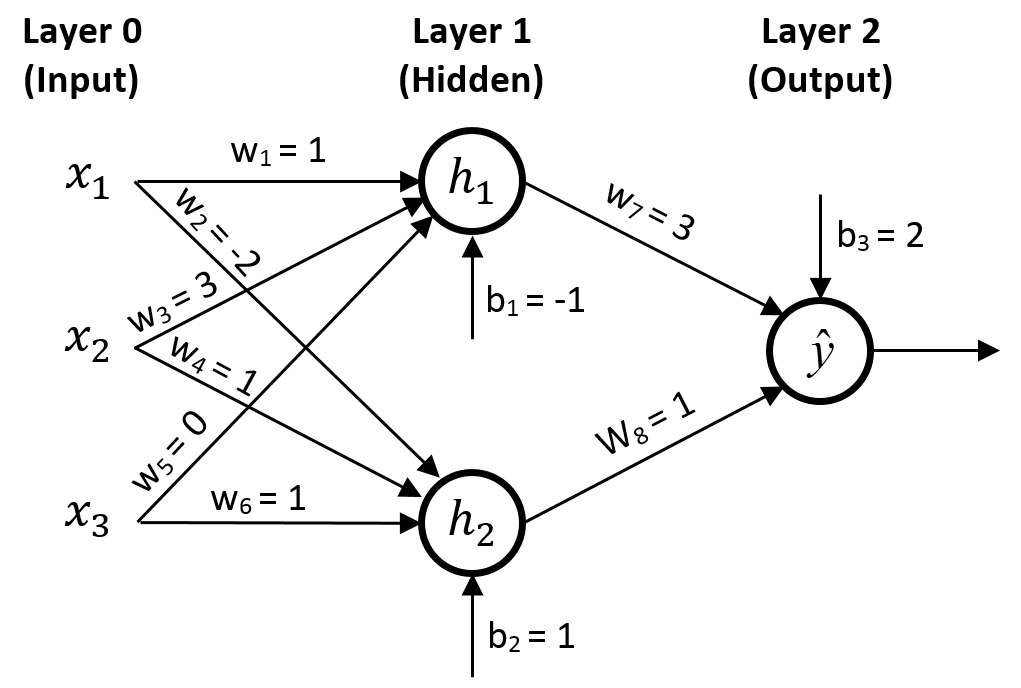
<figcaption>Figure 1 - A Feedforward Neural Network with Three Layers</figcaption>
</figure>

In [38]:
# TODO: Add a line of code to set initial weights for the first linear layer (net[0]),
# using a 2-D tensor denoting a 2x3 matrix with the specified values in Figure 1.
net[0].weight.data = torch.tensor([[1.0,-2.0,0.0],[-2.0,1.0,1.0]])

# TODO: Add a line of code to set initial biases for the first linear layer (net[0]),
# using a 1-D tensor denoting a length-2 vector with the specified values in Figure 1.
net[0].bias.data = torch.tensor([-1.0,1.0])

# TODO: Add a line of code to set initial weights for the second linear layer (net[2]),
# using a 2-D tensor denoting a 1x2 matrix with the specified values in Figure 1.
net[2].weight.data = torch.tensor([[3.0,1.0]])

# # TODO: Add a line of code to set initial biases for the second linear layer (net[2]),
# # using a 1-D tensor denoting a length-1 vector with the specified values in Figure 1.
net[2].bias.data = torch.tensor([2.0])


## 1.6 Make Predictions on New Inputs

Given input values $(x_1, x_2, x_3) = (-1, 0, 1)$, we define them as a 1-D tensor `(x)`, representing a vector of length 3.

In [35]:
# TODO: Add a line of code to define input data as a 1-D tensor (x) representing a vector of length 3.
input= torch.tensor([-1.0,0.0,1.0])


To predict the output `(y_pred)` of the network, we next pass the input data `(x)` through the previously defined network model `(net)`.

In [39]:
# TODO: Add a line of code to pass the input data (x) through the network (net) to get predicted output (y_pred)
y_pred=net(input)
# Convert the output tensor to a NumPy array and print the predictive values
# Here, detach() is used to detach the tensor from the computation graph,
#       numpy() is used to convert it to a NumPy array.
print("Predictions:", y_pred.detach().numpy())


Predictions: [0.52678597]


# <a name="ex2">Exercise 2</a> - Backpropagation

Based on the network built in Exercise 1, we next learn how to track gradient updates, visualise computational graph, and implement a training loop that involves a custom loss function, backpropagation, and optimisation with stochastic gradient descent (SGD).

Specifically, using PyTorch, we will complete the following tasks:


*  Using the network `net` and the predicted output `y_pred` from Exercise 1, we define the loss function `Loss` between `y_pred` and the actual output `y` as follows:

$$ L = Loss(y, y_{pred}) := \frac{1}{2} (y - y_{pred})^2$$

1.  Given the actual output `y=1`, compute the new gradient $∂L / ∂w_5  $ after one backward pass.

2.  Setting the learning rate $\alpha = 0.1$, compute the updated weight `w5` after one backward pass.

3.  Visualise the computational graph for the given `Loss`.

## 2.1 Evaluate Loss

First, we define a custom loss function `Loss` that inherits from `nn.Module` as follows. The `forward` function defines the computation for the loss function. Based on the loss definition, the loss function returns the mean squared difference between predicted `y_pred` and actual `y`, scaled by `1/2`.


In [45]:
# Create a custom loss function using PyTorch's nn.Module
#   y_pred: Predicted output from the network
#   y: Actual target values

class Loss(nn.Module):
    def forward(self, y_pred, y):
        # TODO: Add a line of code to calculate the loss (l) between predicted (y_pred) and actual (y).
        l = 0.5*(y-y_pred)**2
        return l

# Define a loss function to be our custom loss function Loss
loss_function = Loss()

Next, we create a 1-D tensor representing the actual (target) output `y=1`, and calculate the `loss` using the defined loss function `(loss_function)`, along with the predicted `(y_pred)` and actual output `(y)`.





In [46]:
# TODO: Add a line of code to create a 1-D tensor 'y' with a single target output y=1.0 using torch.tensor
y = torch.tensor([1.0])

#  TODO: Add a line of code to calculate the 'loss' using the defined 'loss_function',
#        along with the predicted ('y_pred') and actual ('y') output.
loss = loss_function(y_pred,y)

## 2.2 Backpropagation

We next perform backpropagation for one pass to update the network weights and bias. We call the `backward()` method of the `loss` function to compute the gradients of the network parameters (e.g. weights and biases) with respect to the `loss`.  The computed gradients are stored in the respective parameter tensors and can be used for parameter updates.  This step is a crucial part of the training process, enabling the optimization algorithm to adjust the model's parameters based on the calculated gradients.

In [48]:
#TODO: Add a line of code to call backward() method of the loss function,
#      which calculates the gradients of the network parameters with respect to the loss.
x=loss.backward()

After one backpropagation pass, the gradients are accessible via the `.grad` attribute of each parameter tensor. For example,

*  `net[0].weight.grad` stores the gradient for all weights `(w1-w6)` in the first fully connected layer of the `net` model.
*  `net[2].bias.grad` stores the gradient for the bias `(b3)` in the second fully connected layer of the `net` model.

We now display the gradient $∂L/∂w_5$ for the weight `(w5)` in the first fully connected layer of the `net` network.

In [55]:
print("Gradient dL/dw5 after one backward pass:")
print(net[0].weight.grad[0][2])




Gradient dL/dw5 after one backward pass:
tensor(-0.0250)


## 2.3 Update Weights through SGD

We next update the weights and biases using a Stochastic Gradient Descent (SGD) optimiser (`optim.SGD`) with a learning rate $\alpha = 0.1$. Note that `net.parameters()`, which represents the parameters (weights and biases) of the `net` network, can be used for SGD optimisation.

In [58]:
# Import the 'optim' module from PyTorch for optimisation algorithms
import torch.optim as optim

# TODO: Add a line of code to update the weights and biases using a SGD optimiser (optim.SGD) with a learning rate (lr=0.1)
optimiser = optim.SGD(params=net.parameters(),lr=0.1)

# Update the network parameters (weights and biases) based on the computed gradients and the specified learning rate.
# This step is a crucial part of the optimisation process, adjusting the network to minimise the loss.
optimiser.step()

# TODO: Add a line of code to print the updated weight (w5) after the optimiser step
#       Hint:  'net[0].weight.data' displays the updated weights (w1-w6) of the first fully connected layer
print("\nUpdated weight (w5) after one backward pass:")
print(net[0].weight.data[0][2])


Updated weight (w5) after one backward pass:
tensor(0.0025)


## 2.4 Visualise Computational Graph

Finally, we generate a visualisation of the computational graph for the backward pass (gradients computation). The computational graph during the backward pass provides a visual representation of how gradients are calculated and propagated backward through the network. It is a useful tool for understanding how the model learns and how parameter updates are determined during the training process.


We first install `torchviz` library and import necessary functions for visualising PyTorch computational graphs.

In [59]:
# Install the 'torchviz' library for visualising computational graphs
!pip install torchviz

# Import the 'make_dot' function from the 'torchviz' module for creating a visualisation of the computational graph
from torchviz import make_dot

# Import the 'display' function and 'Image' class from IPython.display for displaying images
from IPython.display import display, Image

Using `make_dot`, we then create a visualisation of the computational graph with the specified `loss` and network parameters. Next, we render the graph as a PNG image and save it as `omputational_graph.png`. Finally, we display the rendered graph using the `display` function.


In [94]:
# # TODO: Add a line of code to create a graph visualisation using 'make_dot' with the 'loss' and network parameters 'net.named_parameters()'
# values= []
# print(net.named_parameters().items())
# # for item in list(net.named_parameters()):
# #   print(item[0])
# #   values.append(item)
# x=0
# # dot = make_dot(loss, params={"x":net.named_parameters(),"loss":loss})

# dot = make_dot(loss,params={"values":list(net.named_parameters())})


# # TODO: Add a line of code to use '.render()' to save the graph as a PNG image named "computational_graph.png"
# dot.render(filename='computational_graph', directory='./', format = 'png', cleanup=True)

# # # Display the rendered graph using the 'display' function
# # display(dot)


## not done, just visualising computational graph

## 2.5 Encapsulate All into a Training Loop

The previous exercises focus only on a single forward and backward pass. We now integrate and encapsulate the above code into a training loop with a specified number of epochs `(num_epochs = 1000)`. Inside this loop, it performs a forward pass, computes the loss, backpropagates the gradients, updates the weights and biases using SGD, and zeros the gradients for the next iteration.

Additionally, add a list `loss_values` to record the loss values at each epoch during training for later visualisation.

In [77]:
import torch
import torch.nn as nn

# TODO: Integrate and Encapsulate the above code into a training loop
#       with a specified number of epochs (num_epochs = 1000)



learning_rate = 0.1
num_epochs = 1000  # The number of epochs

optimiser = optim.SGD(params=net.parameters(),lr=learning_rate)
loss_func=Loss()



# Lists to store loss values for plotting
loss_values = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = net(input)

    # Calculate the loss
    loss = loss_func(y_pred,y)

    # Store the loss value
    loss_values.append(loss.item())

    # Print the loss for each epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

    # Backward pass
    loss.backward()
    optimiser.step()

    # Update weights and biases using SGD optimiser
    with torch.no_grad():
        for param in net.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients for the next iteration
    net.zero_grad()


Epoch 1/1000, Loss: 0.10774815827608109
Epoch 101/1000, Loss: 0.005179159343242645
Epoch 201/1000, Loss: 0.002146766521036625
Epoch 301/1000, Loss: 0.0012310767779126763
Epoch 401/1000, Loss: 0.0008090648334473372
Epoch 501/1000, Loss: 0.0005755133461207151
Epoch 601/1000, Loss: 0.0004321026208344847
Epoch 701/1000, Loss: 0.0003377263492438942
Epoch 801/1000, Loss: 0.00027236496680416167
Epoch 901/1000, Loss: 0.00022524726227857172


## 2.6 Plot Loss Values

Finally, we plot the training loss `(loss_values)` over time using the `matplotlib.pyplot` module.

<ipython-input-79-18d245456e99>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


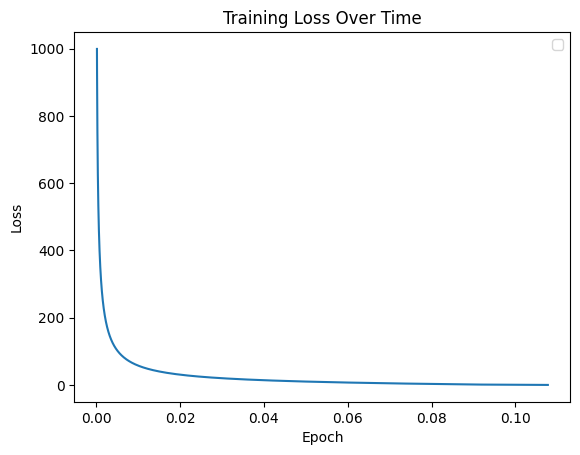

In [79]:
# Import the 'matplotlib.pyplot' module for plotting figures
import matplotlib.pyplot as plt

# TODO: Add a line of code to plot the loss values against the epochs
plt.plot(loss_values,range(num_epochs))

plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()